In [100]:
import warnings
warnings.filterwarnings('ignore')


In [101]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [102]:
tsp_dataset = pd.read_csv("../datasets/tsp.csv")
tsp_points = tsp_dataset.values[:, 1:]
#shuffle cause initial points path too good
np.random.shuffle(tsp_points)


In [103]:
def print_path(points):
    res_points = list()
    for point in points:
        if not res_points:
            res_points.append(point)
        elif not np.array_equal(res_points[-1], point):
            res_points.append(np.array([res_points[-1][0], point[1]]))
            res_points.append(point)
    res_points = np.array(res_points)
    plt.plot(res_points[:, 0], res_points[:, 1])
    plt.scatter(res_points[:, 0], res_points[:, 1])
    plt.show()

def len_path(points):
    x_dst = np.sum(np.abs(points[1:, 0] - points[:-1, 0]))
    y_dst = np.sum(np.abs(points[1:, 1] - points[:-1, 1]))
    return x_dst + y_dst



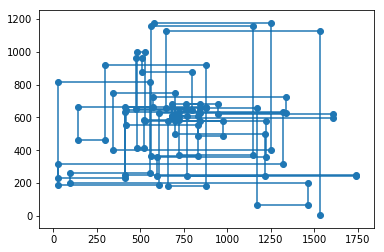

Simple path len
37180


In [104]:
print_path(tsp_points)
print("Simple path len")
print(len_path(tsp_points))



In [105]:
#just shuffling
def monte_carlo_search(points, iterations):
    best_len = len_path(points)
    best_path = copy.copy(points)
    for _ in range(iterations):
        np.random.shuffle(points)
        cur_len = len_path(points)
        if cur_len < best_len:
            best_len = cur_len
            best_path = copy.copy(points)
    return best_len, best_path


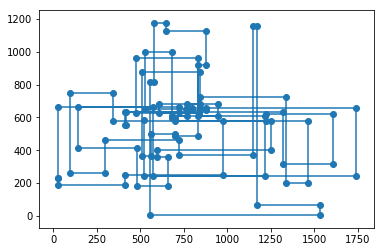

Monte Carlo path len
29195


In [106]:
(mc_len, mc_path) = monte_carlo_search(copy.copy(tsp_points), 10000)
print_path(mc_path)
print("Monte Carlo path len")
print(mc_len)



In [109]:
def random_walk_search(points, iterations):
    best_len = len_path(points)
    best_path = copy.copy(points)
    for _ in range(iterations):
        fst, snd = np.random.choice(points.shape[0], 2, replace=False)
        if fst == snd:
            continue
        tmp = copy.copy(points[fst])
        points[fst] = points[snd]
        points[snd] = tmp
        cur_len = len_path(points)
        if cur_len < best_len:
            best_len = cur_len
            best_path = copy.copy(points)
    return best_len, best_path


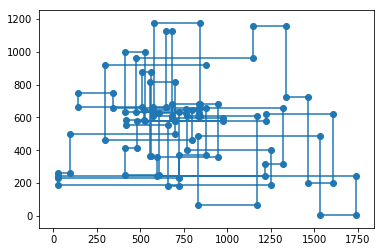

Random Walk path len
28735


In [111]:
(rw_len, rw_path) = random_walk_search(copy.copy(tsp_points), 10000)
print_path(rw_path)
print("Random Walk path len")
print(rw_len)


In [112]:
def hill_climb_search(points, iterations):
    for _ in range(iterations):
        fst = np.random.choice(points.shape[0], 1, replace=False)
        
        cur_iter_len = len_path(points)
        cur_iter_path = copy.copy(points)
        
        for snd in range(points.shape[0]):
            if snd == fst:
                continue
                
            path = copy.copy(points)
            
            tmp = copy.copy(path[fst])
            path[fst] = path[snd]
            path[snd] = tmp
            
            cur_len = len_path(path)
            if cur_len < cur_iter_len:
                cur_iter_len = cur_len
                cur_iter_path = copy.copy(path)
        
        points = copy.copy(cur_iter_path)
    
    return len_path(points), points


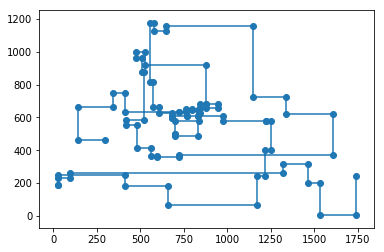

Hill Climp path len
12420


In [114]:
(hc_len, hc_path) = hill_climb_search(copy.copy(tsp_points), 10000)
print_path(hc_path)
print("Hill Climp path len")
print(hc_len)